In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/zippyz/cats-and-dogs-breeds-classification-oxford-dataset")

Skipping, found downloaded files in "./cats-and-dogs-breeds-classification-oxford-dataset" (use force=True to force download)


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    "cats-and-dogs-breeds-classification-oxford-dataset/images",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 5912 images belonging to 1 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    "cats-and-dogs-breeds-classification-oxford-dataset/images",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1478 images belonging to 1 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

# detect edges and colors
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2))) # shrink image to half size --> 64x64

# detect shapes and textures
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# thinking
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import plot_model

# summary() gives you the text list
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

Epoch 1/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 103s 545ms/step - accuracy: 0.9785 - loss: 0.0225 - val_accuracy: 1.0000 - val_loss: 5.8779e-17
Epoch 2/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 97s 523ms/step - accuracy: 1.0000 - loss: 1.6757e-18 - val_accuracy: 1.0000 - val_loss: 5.8779e-17
Epoch 3/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 103s 558ms/step - accuracy: 1.0000 - loss: 4.5966e-21 - val_accuracy: 1.0000 - val_loss: 5.8779e-17
Epoch 4/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 100s 541ms/step - accuracy: 1.0000 - loss: 3.4148e-22 - val_accuracy: 1.0000 - val_loss: 5.8779e-17
Epoch 5/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 99s 535ms/step - accuracy: 1.0000 - loss: 1.2992e-22 - val_accuracy: 1.0000 - val_loss: 5.8779e-17
Epoch 6/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 141s 533ms/step - accuracy: 1.0000 - loss: 4.7376e-20 - val_accuracy: 1.0000 - val_loss: 5.8779e-17
Epoch 7/15
185/185 ━━━━━━━━━━━━━━━━━━━━ 99s 535ms/step - accuracy: 1.0000 - loss: 6.5773e-23 - val_accuracy: 1.0000 - val_loss: 5.8779e-17
Epoch 8/15
185/185 ━━━━━━━━

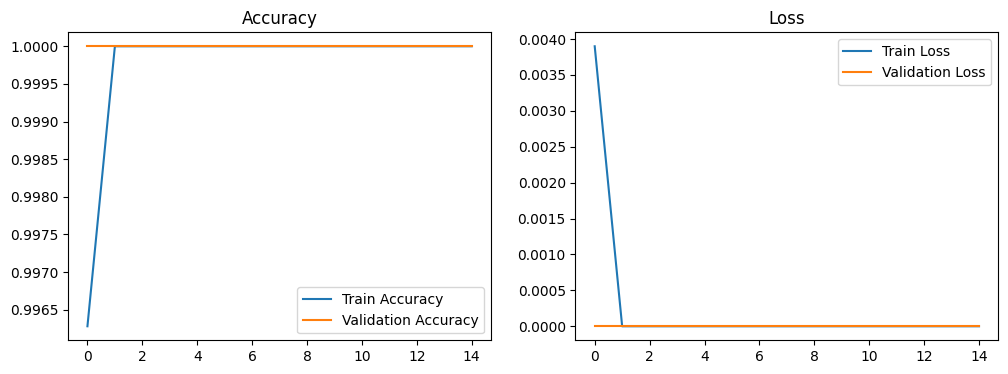

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()